<h1>Import Libraries<h1/>

In [1]:
import os
import cv2 as cv
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from sklearn.model_selection import train_test_split


<h1>Features for dataset<h1/>

In [2]:
# Class Names and Class labels for the 2 classification
class_names = ['normal','covid']
# 0 = normal, 1 = Covid 
class_labels = [0,1]

<h1>Data Exploration<h1/>

In [3]:
# Initialize Count 
normalCount=0
covidCount=0
imageCount=0

# Image size: 299 x 299 Pixels grayscale
image_size = (299, 299)

# Read image files - PNG
for class_name in class_names:
    for item in os.listdir(os.getcwd()+f'/dataset_6/{class_name}/'):
        if item.endswith(".png"):
            
            # Check image size 299 x 299
            image_path = os.path.join(os.getcwd(), 'dataset_6', class_name, item)
            # Raise Error if not correct size
            if Image.open(image_path).size != image_size:
                raise ValueError(f"The image size is not {image_size[0]} by {image_size[1]} pixels: {image_path}")
            
            # Increment Counter for images
            imageCount+=1
            if(class_name=='normal'):
                normalCount+=1
            else:
                covidCount+=1
                
print(f"Normal Count: {normalCount}\nCovid Count: {covidCount}\nTotal Count: {imageCount}\n")

Normal Count: 250
Covid Count: 180
Total Count: 430



<h1>Create Dataset for training Model<h1/>

In [4]:
# np array for images. 430 images, 299 pixel, 299 pixels
images = np.empty((imageCount,image_size[0],image_size[1]))
# np arraay for image labels, 430 labels
labels = np.empty((imageCount,1))

# Index for assigning image to np array loction
index=0

# Loop Through normal/covid img folders
for label,class_name in enumerate(class_names):
    # Iterate through items in folder
    for item in os.listdir(os.getcwd()+f'/dataset_6/{class_name}/'):
        # if item is png image
        if item.endswith(".png"):
            image_path = os.getcwd()+f'/dataset_6/{class_name}/{item}'
            # Read item into np array
            image = np.array(Image.open(image_path))
            # Normalize image from 0-255, to 0 to 1
            image = image/255 #???? Normalize?
            # Add image to np array
            images[index]=image
            # Add label to np array
            labels[index]=label
            index+=1
# Convert labels to INT
labels=np.array(labels,dtype=np.int32)

<h1>Visualize images from normal and covid folder<h1/>

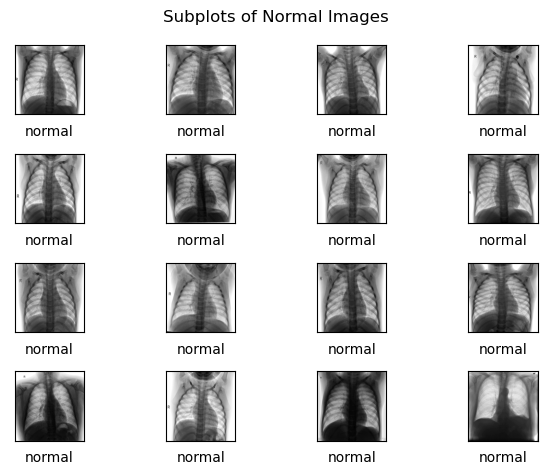

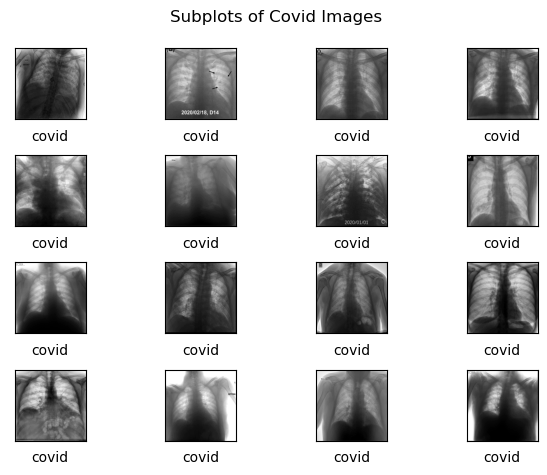

In [5]:
#Visualization for both normal and Covid
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[i][0]])
plt.subplots_adjust(top=0.9) 
plt.suptitle("Subplots of Normal Images")  
plt.tight_layout()
plt.show()


for i in range(normalCount,normalCount+16):
    plt.subplot(4,4,i-normalCount+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(labels[i][0])])
plt.tight_layout()
plt.subplots_adjust(top=0.9) 
plt.suptitle("Subplots of Covid Images")  
plt.show()

<h1>Splt dataset into training and testing dataset <h1/>

In [6]:
#Fixed seed
seed = 88
# Train Test Split for training machine learning and Deep Learning
# Split percentage 80% for train, 20% for test. 
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=seed
)

<h1>Visualize Training Dataset<h1/>

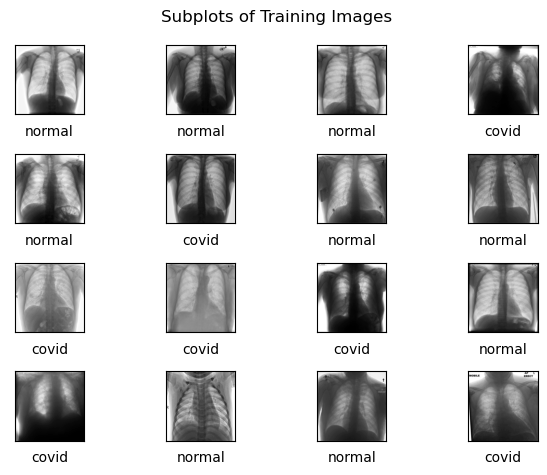

In [7]:
#Visualize new dataset of both covid and normal lungs
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.subplots_adjust(top=0.9) 
plt.suptitle("Subplots of Training Images")  
plt.tight_layout()
plt.show()